<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/ComparaModelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparación de Modelos de Machine Learning: Diabetes en Indios Pima

Este notebook presenta una implementación detallada de múltiples modelos de machine learning para predecir la diabetes en el dataset de Indios Pima, con un enfoque en la evaluación rigurosa de rendimiento mediante métricas complementarias.

## 1. Preparación de los datos

### Carga y exploración inicial

El dataset de diabetes de los Indios Pima contiene información médica de mujeres nativas americanas, con una variable objetivo binaria que indica la presencia (1) o ausencia (0) de diabetes. Contiene 768 instancias y 9 atributos, incluyendo:
- Número de embarazos
- Concentración de glucosa
- Presión arterial
- Grosor del pliegue cutáneo del tríceps
- Insulina sérica
- IMC (Índice de Masa Corporal)
- Función de pedigrí de diabetes (antecedentes genéticos)
- Edad
- Variable objetivo (0 o 1)

### Preprocesamiento

Se realizaron los siguientes pasos de preprocesamiento:

1. **Identificación y tratamiento de valores faltantes**:
   - En este dataset, los valores cero en ciertas variables fisiológicas (glucosa, presión arterial, grosor de piel, insulina, IMC) representan valores faltantes.
   - Estos ceros fueron reemplazados por NaN y posteriormente imputados usando la mediana de cada columna.

2. **Escalado de características**:
   - Se aplicó estandarización (StandardScaler) para normalizar todas las características, garantizando que cada variable contribuya proporcionalmente al análisis.

3. **División de datos**:
   - Se separó un 20% de los datos para prueba, preservando la proporción de clases (muestreo estratificado).
   - El 80% restante se utilizó para entrenamiento y validación cruzada.

## 2. Modelos de Machine Learning implementados

Se implementaron y compararon 13 algoritmos de clasificación:

- **Regresión Logística**: Modelo lineal que estima la probabilidad de diabetes mediante la función logística.
- **LDA (Análisis Discriminante Lineal)**: Encuentra una combinación lineal de características que caracteriza o separa las clases.
- **QDA (Análisis Discriminante Cuadrático)**: Similar a LDA, pero permite límites de decisión cuadráticos.
- **K-Nearest Neighbors**: Clasifica basándose en la mayoría de los k ejemplos más cercanos.
- **SVC lineal**: Máquina de Vector Soporte con kernel lineal.
- **SVC RBF**: Máquina de Vector Soporte con kernel de función de base radial.
- **Naive Bayes**: Clasificador probabilístico basado en el teorema de Bayes.
- **Árbol de Decisión**: Modelo de decisión de estructura arbórea.
- **Random Forest**: Conjunto de árboles de decisión.
- **Extra Trees**: Conjunto de árboles aleatorios.
- **Gradient Boosting**: Conjunto secuencial de árboles para minimizar errores.
- **AdaBoost**: Conjunto adaptativo que se enfoca en instancias mal clasificadas.
- **Red Neuronal (MLP)**: Perceptrón multicapa con capas ocultas.

## 3. Técnicas de evaluación

### Validación cruzada estratificada

Se utilizó validación cruzada estratificada de 10 folds para:
- Mantener la proporción de clases en cada partición
- Obtener estimaciones robustas del rendimiento
- Reducir el sesgo de una única división de datos

### Métricas de evaluación

Se utilizaron múltiples métricas complementarias para evaluar cada modelo:

#### a) Accuracy (Exactitud)
- **Definición**: Proporción de predicciones correctas entre todas las predicciones.
- **Fórmula**: (VP + VN) / (VP + VN + FP + FN)
- **Importancia**: Proporciona una medida general del rendimiento, pero puede ser engañosa en datos desbalanceados.

#### b) Precision (Precisión)
- **Definición**: Proporción de verdaderos positivos entre todos los casos predichos como positivos.
- **Fórmula**: VP / (VP + FP)
- **Importancia**: Relevante cuando el costo de los falsos positivos es alto (por ejemplo, diagnósticos incorrectos).

#### c) Recall (Sensibilidad)
- **Definición**: Proporción de verdaderos positivos entre todos los casos realmente positivos.
- **Fórmula**: VP / (VP + FN)
- **Importancia**: Crucial cuando no detectar casos positivos es más costoso (como no diagnosticar una enfermedad).

#### d) F1 Score
- **Definición**: Media armónica de precision y recall.
- **Fórmula**: 2 * (Precision * Recall) / (Precision + Recall)
- **Importancia**: Equilibra precision y recall, siendo útil cuando hay desequilibrio de clases.
- **¿Por qué es importante?**: El F1 Score es particularmente valioso para evaluar modelos en conjuntos de datos desequilibrados, ya que proporciona una métrica única que penaliza tanto los falsos positivos como los falsos negativos. En el contexto médico, como la detección de diabetes, esto es crucial porque necesitamos equilibrar la capacidad de detectar todos los casos (recall alto) con la necesidad de evitar diagnósticos erróneos (precision alta).

#### e) Índice de Youden
- **Definición**: Sensibilidad + Especificidad - 1
- **Fórmula**: (VP/(VP+FN)) + (VN/(VN+FP)) - 1
- **Interpretación**: Varía de -1 a 1, donde 1 indica un test perfecto y 0 un test inútil.
- **Importancia**: Resume la capacidad de un test diagnóstico para evitar errores de clasificación, combinando la capacidad para detectar casos positivos (sensibilidad) y negativos (especificidad).
- **¿Por qué es importante?**: En aplicaciones médicas, el índice de Youden es fundamental porque:
  - Es menos sensible al desequilibrio de clases que otras métricas
  - Penaliza tanto falsos positivos como falsos negativos
  - Identifica el punto óptimo de corte en la curva ROC
  - Permite maximizar simultáneamente la sensibilidad y especificidad

#### f) Curva ROC y AUC
- **Definición**: La curva ROC (Receiver Operating Characteristic) muestra la sensibilidad frente a (1-especificidad) para diferentes umbrales de decisión.
- **AUC**: Área bajo la curva ROC, que cuantifica la capacidad de discriminación del modelo.
- **Interpretación**: AUC varía de 0.5 (clasificación aleatoria) a 1.0 (clasificación perfecta).
- **Importancia**: Evalúa el rendimiento del modelo independientemente del umbral seleccionado.
- **¿Por qué es importante?**: La curva ROC y su AUC asociada son métricas cruciales porque:
  - Son robustas ante el desequilibrio de clases
  - Muestran el rendimiento global del modelo para todos los posibles umbrales
  - Permiten comparar modelos de forma visual y cuantitativa
  - Ayudan a seleccionar el umbral óptimo según las necesidades (maximizar sensibilidad o especificidad)

## 4. Selección del modelo óptimo

La selección del modelo óptimo se basó en múltiples criterios:

1. **Rendimiento en validación cruzada**: Se priorizaron modelos con alto F1 Score y bajo desvío estándar entre folds.
   
2. **Evaluación en conjunto de prueba**: Se verificó que no existiera sobreajuste, comparando métricas de validación y prueba.

3. **Análisis de la curva ROC**: Se identificó el umbral óptimo que maximiza el índice de Youden.

4. **Calibración de probabilidades**: Se evaluó la fiabilidad de las probabilidades predichas.

5. **Interpretabilidad del modelo**: Se analizó la importancia de características para entender los factores determinantes.

## 5. Optimización de hiperparámetros

Se optimizaron los hiperparámetros del mejor modelo mediante búsqueda en cuadrícula (GridSearchCV), buscando maximizar el F1 Score mediante validación cruzada.

## 6. Análisis de resultados

### Comparación visual de modelos
- Gráficos de barras comparativos para F1 Score e Índice de Youden
- Curvas ROC para los 5 mejores modelos
- Gráfico de radar para visualizar múltiples métricas simultáneamente

### Análisis de resultados del mejor modelo
- Matriz de confusión
- Curvas ROC detalladas con punto óptimo
- Curva Precision-Recall
- Importancia de características o coeficientes

## 7. Consideraciones finales

### Equilibrio entre métricas
Es fundamental entender las compensaciones entre diferentes métricas según el contexto:
- **En diagnóstico médico**: Puede ser preferible maximizar la sensibilidad para no pasar por alto casos de diabetes.
- **En programas de prevención con recursos limitados**: Podría ser mejor maximizar la precisión para enfocar recursos en casos verdaderamente positivos.

### Interpretabilidad vs. rendimiento
Dependiendo del uso final, podría preferirse:
- Un modelo más simple con interpretabilidad clara (Regresión Logística, LDA, Árbol de Decisión)
- Un modelo más complejo con mayor rendimiento predictivo (Gradient Boosting, Random Forest)

### Calibración de probabilidades
La calibración adecuada de las probabilidades es crucial para aplicaciones de diagnóstico, donde es necesario cuantificar la incertidumbre.

## 8. Conclusión

La combinación de múltiples modelos y métricas de evaluación complementarias proporciona una comprensión robusta del problema de predicción de diabetes. El índice de Youden y el F1 Score, junto con las curvas ROC, ofrecen una visión completa del rendimiento de los modelos para la toma de decisiones médicas informadas.

Dimensiones del dataset: (768, 9)

Primeras 5 filas:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Estadísticas descriptivas:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.7994

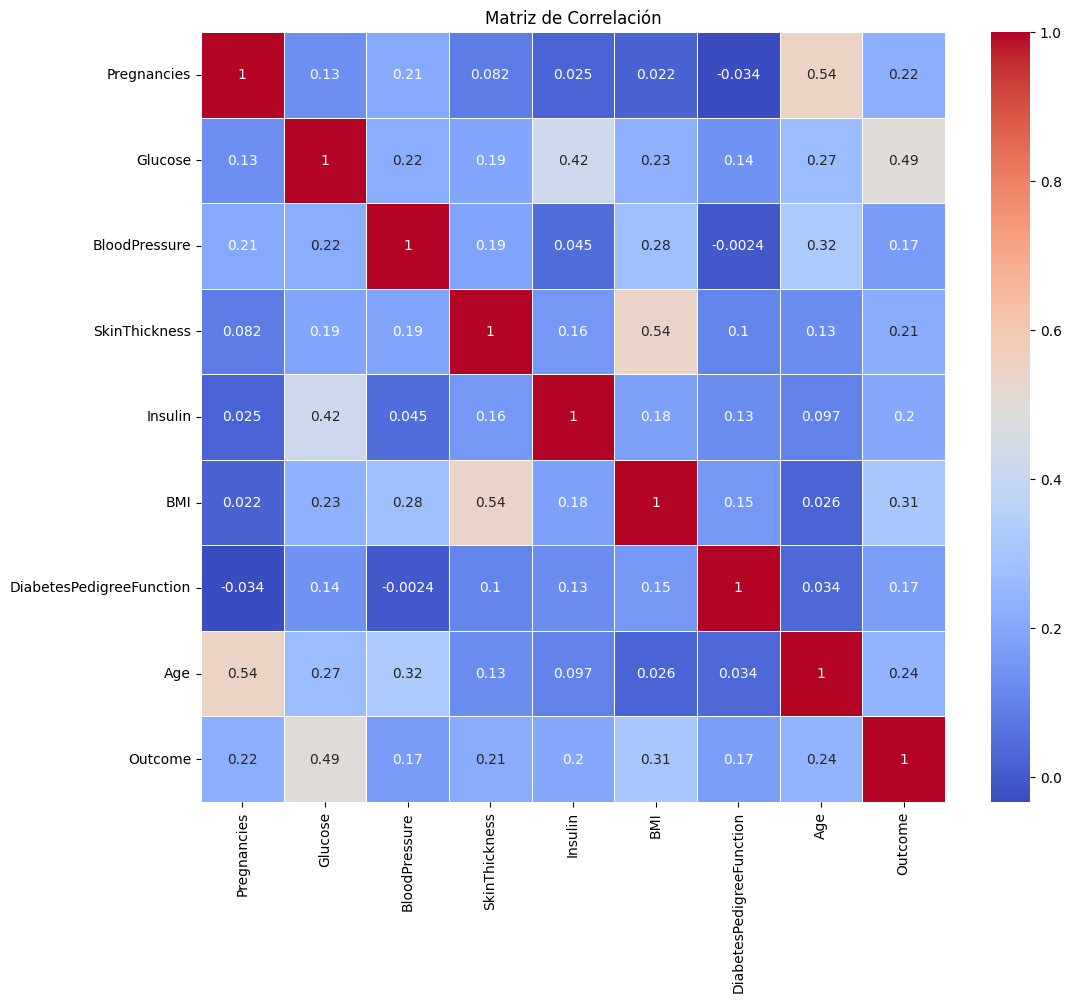

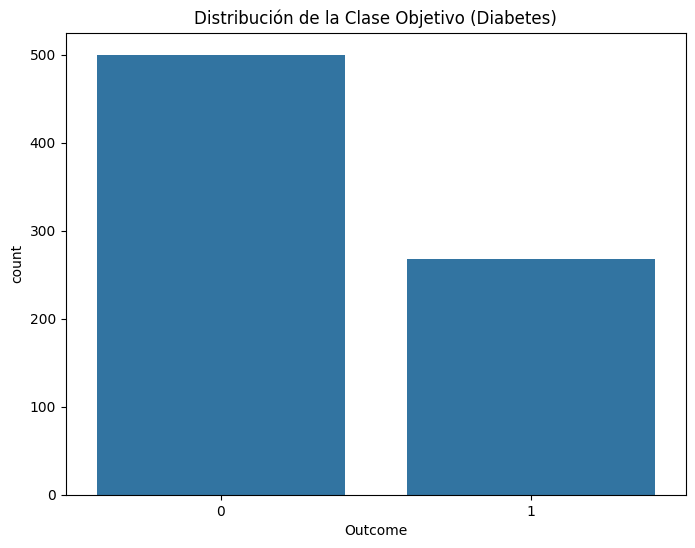


Evaluación de modelos (Validación Cruzada):

Evaluando: Regresión Logística
accuracy: 0.7899 (±0.0394)
precision: 0.7691 (±0.0894)
recall: 0.5797 (±0.0558)
f1: 0.6584 (±0.0572)
roc_auc: 0.8434 (±0.0336)
youden: 0.4822 (±0.0790)

Evaluando: LDA
accuracy: 0.7851 (±0.0381)
precision: 0.7573 (±0.0827)
recall: 0.5753 (±0.0625)
f1: 0.6509 (±0.0586)
roc_auc: 0.8430 (±0.0351)
youden: 0.4728 (±0.0794)

Evaluando: QDA
accuracy: 0.7541 (±0.0377)
precision: 0.6922 (±0.0857)
recall: 0.5524 (±0.0775)
f1: 0.6089 (±0.0595)
roc_auc: 0.8151 (±0.0509)
youden: 0.4149 (±0.0806)

Evaluando: K-Nearest Neighbors
accuracy: 0.7361 (±0.0752)
precision: 0.6461 (±0.1308)
recall: 0.5896 (±0.0992)
f1: 0.6107 (±0.0991)
roc_auc: 0.7941 (±0.0755)
youden: 0.4046 (±0.1476)

Evaluando: SVC lineal
accuracy: 0.7851 (±0.0375)
precision: 0.7624 (±0.0826)
recall: 0.5658 (±0.0624)
f1: 0.6470 (±0.0597)
roc_auc: 0.8427 (±0.0309)
youden: 0.4683 (±0.0796)

Evaluando: SVC RBF
accuracy: 0.7770 (±0.0421)
precision: 0.7322 (±0.0867)
r

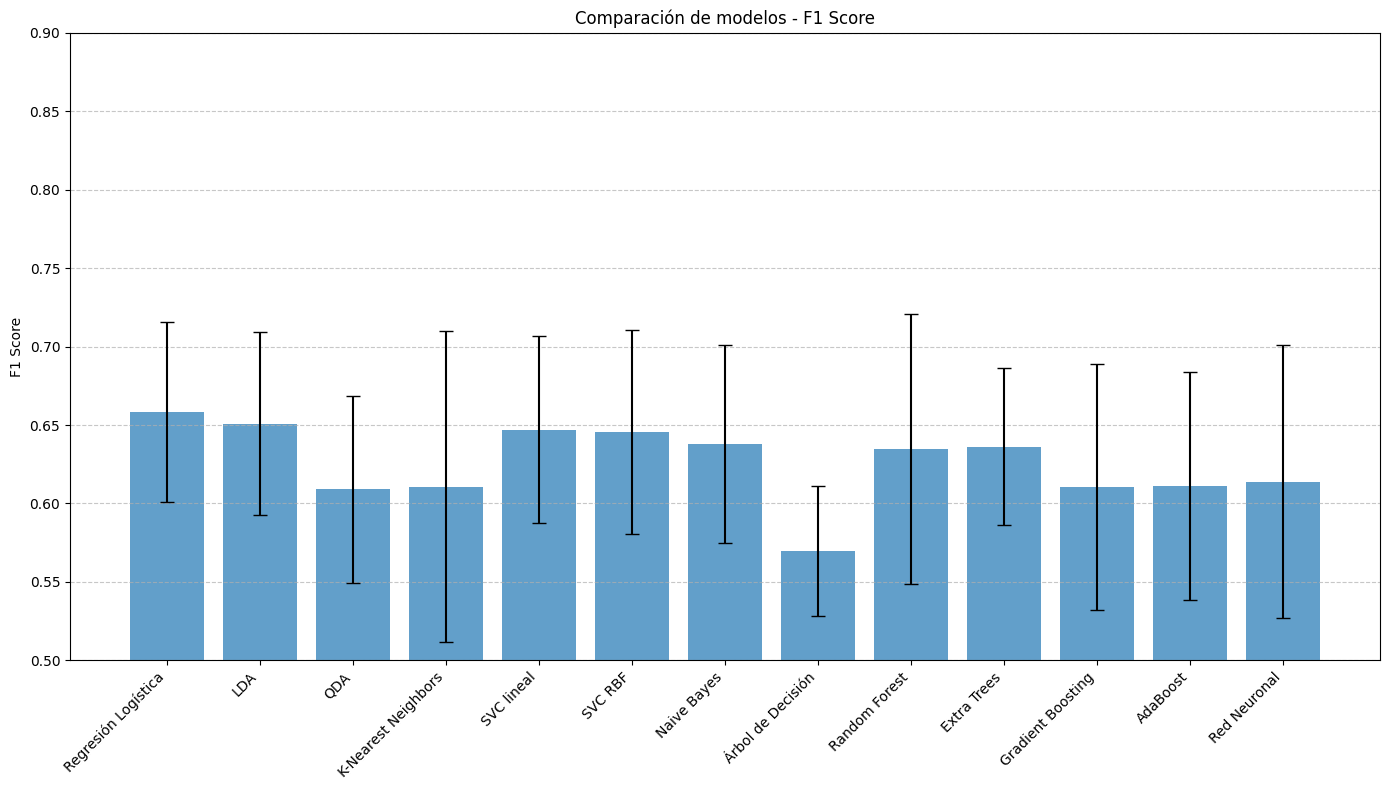

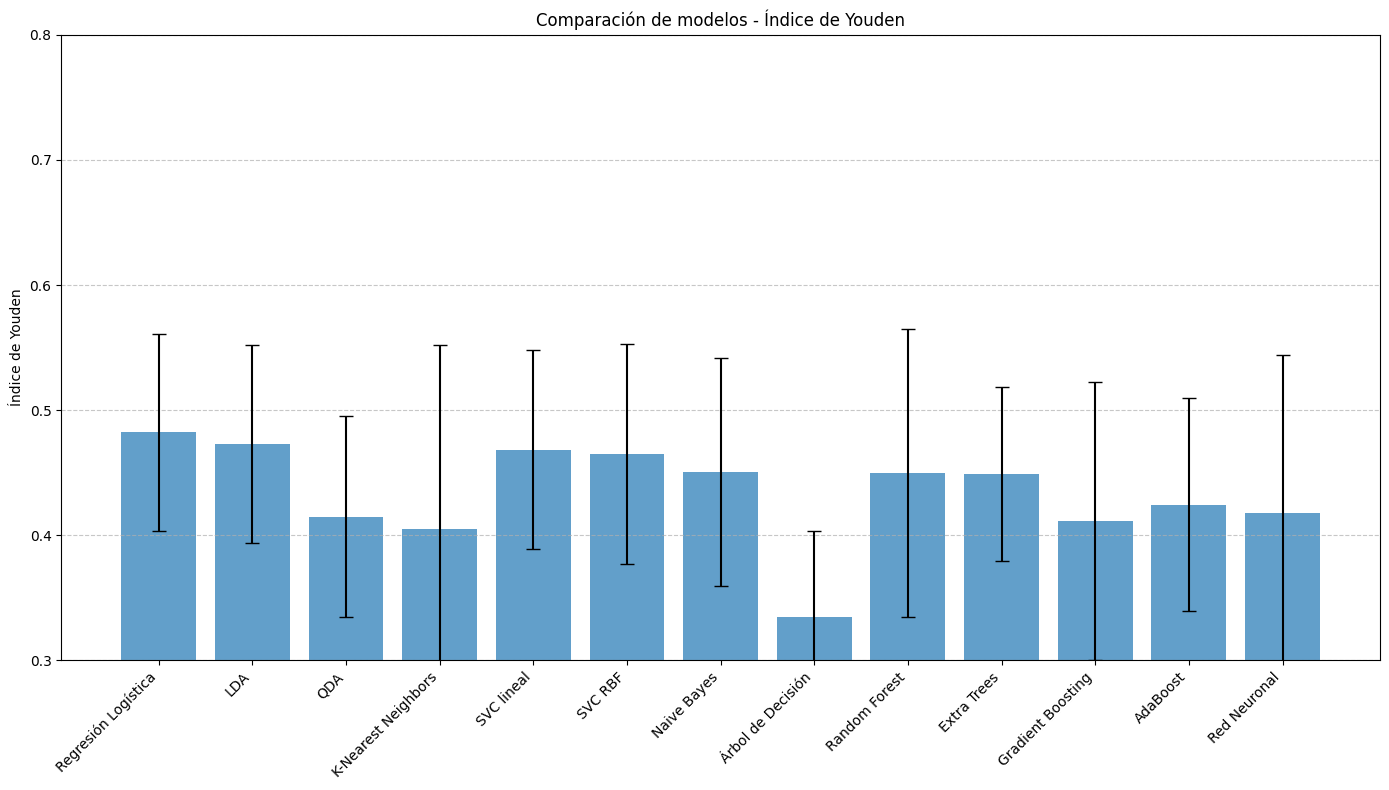


Los 5 mejores modelos según F1 Score:
1. Regresión Logística: F1 = 0.6584
2. LDA: F1 = 0.6509
3. SVC lineal: F1 = 0.6470
4. SVC RBF: F1 = 0.6456
5. Naive Bayes: F1 = 0.6380

Regresión Logística:
Accuracy: 0.7078
Precision: 0.6000
Recall: 0.5000
F1 Score: 0.5455
Índice de Youden: 0.3200
ROC AUC: 0.8130

LDA:
Accuracy: 0.7013
Precision: 0.5909
Recall: 0.4815
F1 Score: 0.5306
Índice de Youden: 0.3015
ROC AUC: 0.8126

SVC lineal:
Accuracy: 0.7013
Precision: 0.5909
Recall: 0.4815
F1 Score: 0.5306
Índice de Youden: 0.3015
ROC AUC: 0.8131

SVC RBF:
Accuracy: 0.7403
Precision: 0.6522
Recall: 0.5556
F1 Score: 0.6000
Índice de Youden: 0.3956
ROC AUC: 0.7964

Naive Bayes:
Accuracy: 0.7013
Precision: 0.5667
Recall: 0.6296
F1 Score: 0.5965
Índice de Youden: 0.3696
ROC AUC: 0.7646


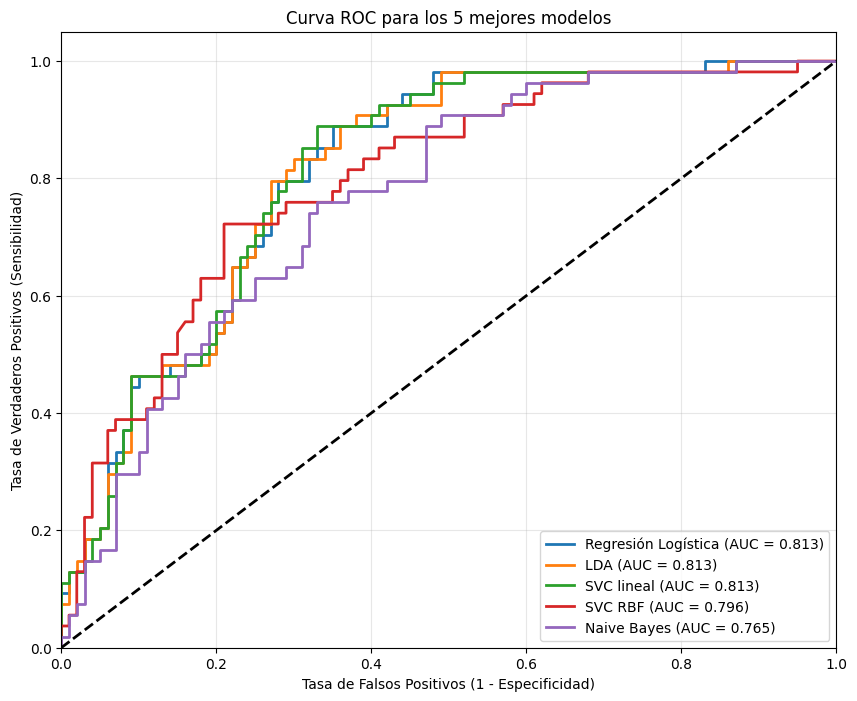


El mejor modelo según ROC AUC es: SVC lineal


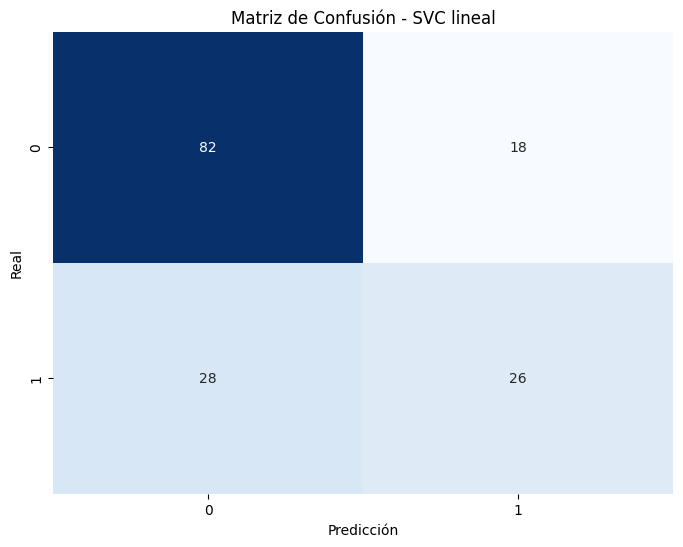


Reporte de Clasificación para el mejor modelo:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



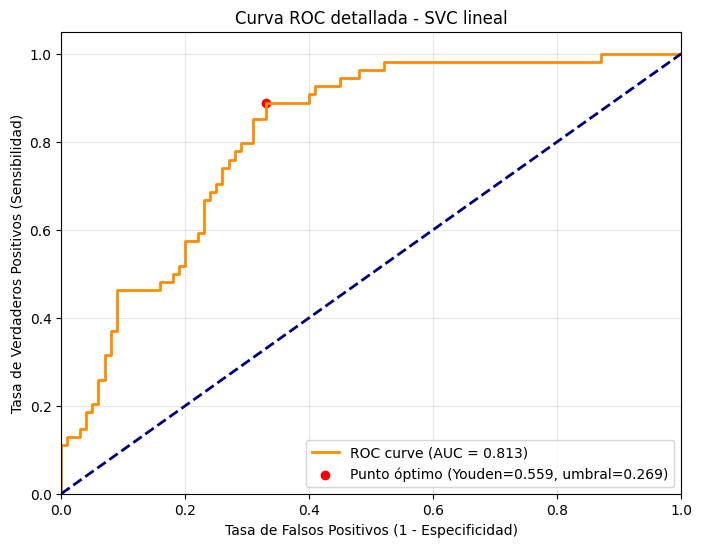

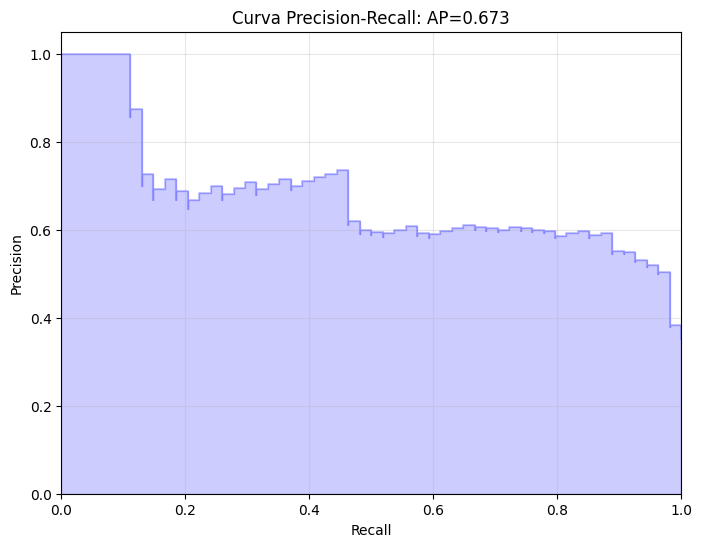

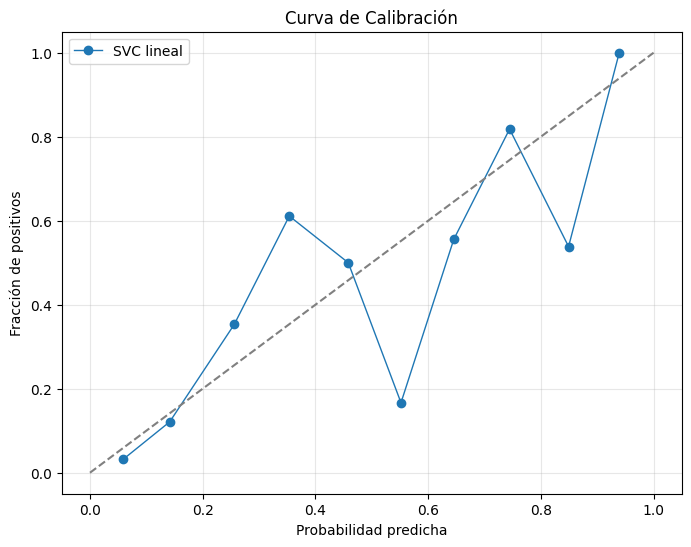


Optimización de hiperparámetros para SVC lineal:
Mejores parámetros: {'C': 0.1, 'gamma': 'scale'}
Mejor puntuación: 0.6270

Rendimiento del modelo optimizado:
Accuracy: 0.7078
Precision: 0.6047
Recall: 0.4815
F1 Score: 0.5361
ROC AUC: 0.8128
Índice de Youden: 0.3115

Modelo optimizado guardado como 'optimized_classification_model.pkl'

Mejor modelo guardado como 'best_classification_model.pkl'

===== RESUMEN DE RESULTADOS =====
Mejor modelo: SVC lineal
F1 Score (validación cruzada): 0.6584
F1 Score (conjunto de prueba): 0.5306
Índice de Youden (conjunto de prueba): 0.3015
ROC AUC (conjunto de prueba): 0.8131
Umbral óptimo (basado en Índice de Youden): 0.2686


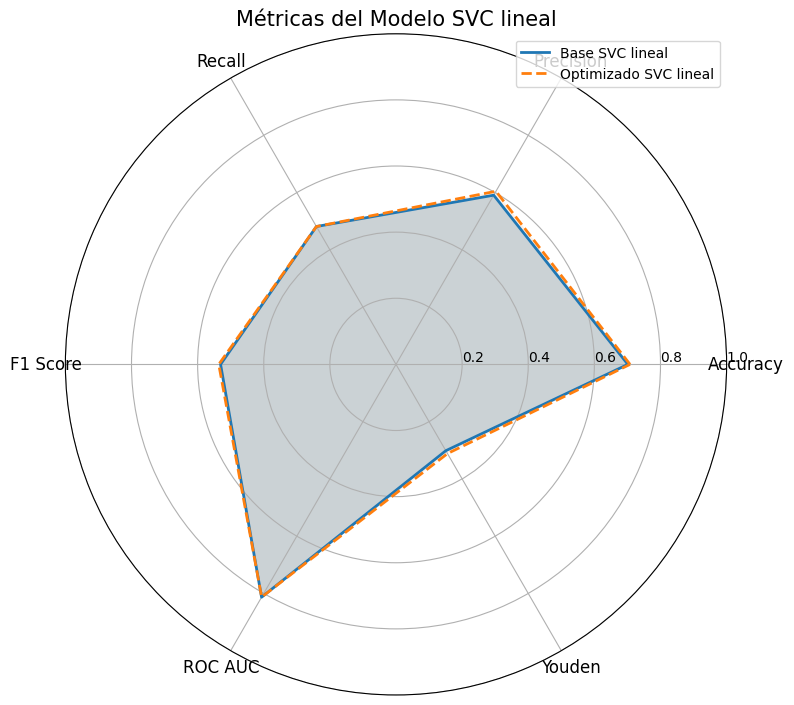


Análisis completado. Todas las visualizaciones y resultados han sido guardados.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_auc_score, confusion_matrix, classification_report,
                            roc_curve, auc, precision_recall_curve, average_precision_score)
from sklearn.calibration import calibration_curve
import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)

# Mostrar información básica del dataset
print("Dimensiones del dataset:", data.shape)
print("\nPrimeras 5 filas:")
print(data.head())
print("\nEstadísticas descriptivas:")
print(data.describe())

# Verificar la distribución de la variable objetivo
print("\nDistribución de la variable objetivo:")
print(data['Outcome'].value_counts())
print(f"Proporción de clase positiva: {data['Outcome'].mean():.4f}")

# Verificar valores nulos o faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# En este dataset, los valores 0 en ciertas columnas pueden indicar datos faltantes
# Reemplazar los ceros por NaN en columnas donde 0 no es un valor válido
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    data[col] = data[col].replace(0, np.nan)

print("\nValores faltantes después de reemplazar ceros:")
print(data.isnull().sum())

# Imputar valores faltantes con la mediana
for col in cols_with_zeros:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

# Análisis exploratorio de datos (EDA)
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.savefig('correlation_matrix_classification.png')
plt.show()

# Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=data)
plt.title('Distribución de la Clase Objetivo (Diabetes)')
plt.savefig('target_distribution.png')
plt.show()

# Para clasificación, predecir el resultado (diabetes = 1, no diabetes = 0)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir una amplia gama de modelos de clasificación para comparar
models = {
    'Regresión Logística': LogisticRegression(max_iter=1000, random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVC lineal': SVC(kernel='linear', probability=True, random_state=42),
    'SVC RBF': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Red Neuronal': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Realizar validación cruzada para cada modelo con múltiples métricas
print("\nEvaluación de modelos (Validación Cruzada):")
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Diccionarios para almacenar resultados
metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'roc_auc': [],
    'youden': []  # Índice de Youden (Sensibilidad + Especificidad - 1)
}
model_names = []

# Función para calcular el índice de Youden
def youden_index(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    return sensitivity + specificity - 1

# Evaluación de modelos
for name, model in models.items():
    model_names.append(name)
    print(f"\nEvaluando: {name}")

    # Entrenamiento y predicción para cada fold
    fold_metrics = {metric: [] for metric in metrics.keys()}

    for train_idx, val_idx in cv.split(X_train_scaled, y_train):
        # Dividir datos para este fold
        X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Entrenar modelo
        model.fit(X_fold_train, y_fold_train)

        # Predicciones
        y_pred = model.predict(X_fold_val)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_fold_val)[:, 1]
        else:
            y_prob = model.decision_function(X_fold_val) if hasattr(model, "decision_function") else None

        # Calcular métricas
        fold_metrics['accuracy'].append(accuracy_score(y_fold_val, y_pred))
        fold_metrics['precision'].append(precision_score(y_fold_val, y_pred))
        fold_metrics['recall'].append(recall_score(y_fold_val, y_pred))
        fold_metrics['f1'].append(f1_score(y_fold_val, y_pred))
        fold_metrics['youden'].append(youden_index(y_fold_val, y_pred))

        if y_prob is not None:
            fold_metrics['roc_auc'].append(roc_auc_score(y_fold_val, y_prob))
        else:
            fold_metrics['roc_auc'].append(np.nan)

    # Calcular promedio de métricas para todos los folds
    for metric, values in fold_metrics.items():
        avg_value = np.mean(values)
        std_value = np.std(values)
        metrics[metric].append((avg_value, std_value))
        print(f"{metric}: {avg_value:.4f} (±{std_value:.4f})")

# Crear DataFrame con resultados para mejor visualización
results_df = pd.DataFrame({
    'Modelo': model_names,
    'Accuracy': [f"{m[0]:.4f} (±{m[1]:.4f})" for m in metrics['accuracy']],
    'Precision': [f"{m[0]:.4f} (±{m[1]:.4f})" for m in metrics['precision']],
    'Recall': [f"{m[0]:.4f} (±{m[1]:.4f})" for m in metrics['recall']],
    'F1 Score': [f"{m[0]:.4f} (±{m[1]:.4f})" for m in metrics['f1']],
    'ROC AUC': [f"{m[0]:.4f} (±{m[1]:.4f})" if not np.isnan(m[0]) else "N/A" for m in metrics['roc_auc']],
    'Índice Youden': [f"{m[0]:.4f} (±{m[1]:.4f})" for m in metrics['youden']]
})
print("\nResumen de métricas de validación cruzada:")
print(results_df)

# Guardar resultados en CSV
results_df.to_csv('model_comparison_results.csv', index=False)

# Visualizar resultados - F1 Score
plt.figure(figsize=(14, 8))
f1_means = [m[0] for m in metrics['f1']]
f1_stds = [m[1] for m in metrics['f1']]
bars = plt.bar(model_names, f1_means, yerr=f1_stds, capsize=5, alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Comparación de modelos - F1 Score')
plt.ylabel('F1 Score')
plt.ylim(0.5, 0.9)  # Ajustar según los resultados reales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_comparison_f1.png')
plt.show()

# Visualizar resultados - Índice de Youden
plt.figure(figsize=(14, 8))
youden_means = [m[0] for m in metrics['youden']]
youden_stds = [m[1] for m in metrics['youden']]
bars = plt.bar(model_names, youden_means, yerr=youden_stds, capsize=5, alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Comparación de modelos - Índice de Youden')
plt.ylabel('Índice de Youden')
plt.ylim(0.3, 0.8)  # Ajustar según los resultados reales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_comparison_youden.png')
plt.show()

# Seleccionamos los 5 mejores modelos basados en F1 score
f1_scores = [m[0] for m in metrics['f1']]
top5_indices = np.argsort(f1_scores)[-5:][::-1]
top5_models = [model_names[i] for i in top5_indices]
top5_model_objects = [models[name] for name in top5_models]

print("\nLos 5 mejores modelos según F1 Score:")
for i, model_name in enumerate(top5_models):
    print(f"{i+1}. {model_name}: F1 = {f1_scores[top5_indices[i]]:.4f}")

# Entrenar y evaluar los mejores modelos en el conjunto de prueba
plt.figure(figsize=(10, 8))
top5_aucs = []

for name, model in zip(top5_models, top5_model_objects):
    # Entrenar modelo
    model.fit(X_train_scaled, y_train)

    # Predicciones
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.decision_function(X_test_scaled) if hasattr(model, "decision_function") else None

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    youden = youden_index(y_test, y_pred)

    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Índice de Youden: {youden:.4f}")

    # Curva ROC para los mejores modelos
    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob)
        top5_aucs.append(roc_auc)
        print(f"ROC AUC: {roc_auc:.4f}")

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
    else:
        top5_aucs.append(np.nan)
        print("ROC AUC: N/A")

# Completar la figura de curva ROC
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC para los 5 mejores modelos')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig('top5_roc_curves.png')
plt.show()

# Seleccionar el mejor modelo basado en métricas de prueba (usaremos el mejor según ROC AUC)
best_model_index = np.nanargmax(top5_aucs)
best_model_name = top5_models[best_model_index]
best_model = top5_model_objects[best_model_index]

print(f"\nEl mejor modelo según ROC AUC es: {best_model_name}")

# Análisis detallado del mejor modelo
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, "predict_proba") else None

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusión - {best_model_name}')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.savefig('best_model_confusion_matrix.png')
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación para el mejor modelo:")
print(classification_report(y_test, y_pred))

# Análisis detallado de la curva ROC
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Cálculo del punto óptimo (índice de Youden máximo)
youden_values = tpr - fpr
optimal_idx = np.argmax(youden_values)
optimal_threshold = thresholds[optimal_idx]
optimal_point = (fpr[optimal_idx], tpr[optimal_idx])

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(optimal_point[0], optimal_point[1], marker='o', color='red',
            label=f'Punto óptimo (Youden={youden_values[optimal_idx]:.3f}, umbral={optimal_threshold:.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title(f'Curva ROC detallada - {best_model_name}')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig('best_model_roc_detailed.png')
plt.show()

# Curva Precision-Recall
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Curva Precision-Recall: AP={avg_precision:.3f}')
plt.grid(alpha=0.3)
plt.savefig('best_model_precision_recall.png')
plt.show()

# Curva de calibración (fiabilidad)
plt.figure(figsize=(8, 6))
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=best_model_name)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Fracción de positivos')
plt.title('Curva de Calibración')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.savefig('best_model_calibration.png')
plt.show()

# Importancia de características (si está disponible)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Importancia de Características - {best_model_name}')
    plt.tight_layout()
    plt.savefig('best_model_feature_importance.png')
    plt.show()

    print("\nImportancia de características:")
    print(feature_importance)
elif isinstance(best_model, LogisticRegression) or isinstance(best_model, LinearDiscriminantAnalysis):
    coefs = best_model.coef_[0] if hasattr(best_model, 'coef_') else None
    if coefs is not None:
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': coefs
        }).sort_values('Coefficient', key=abs, ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
        plt.title(f'Coeficientes - {best_model_name}')
        plt.tight_layout()
        plt.savefig('best_model_coefficients.png')
        plt.show()

        print("\nCoeficientes del modelo:")
        print(feature_importance)

# Optimización de hiperparámetros para el mejor modelo
from sklearn.model_selection import GridSearchCV

print(f"\nOptimización de hiperparámetros para {best_model_name}:")

# Definir parámetros de búsqueda según el tipo de modelo
if isinstance(best_model, LogisticRegression):
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2']
    }
elif isinstance(best_model, RandomForestClassifier) or isinstance(best_model, ExtraTreesClassifier):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif isinstance(best_model, GradientBoostingClassifier):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5]
    }
elif isinstance(best_model, SVC):
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 0.01],
    }
elif isinstance(best_model, KNeighborsClassifier):
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
elif isinstance(best_model, MLPClassifier):
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01]
    }
else:
    # Configuración genérica para otros modelos
    param_grid = {}

# Si hay parámetros para optimizar, realizamos la búsqueda
if param_grid:
    grid_search = GridSearchCV(
        estimator=best_model,
        param_grid=param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)

    print(f"Mejores parámetros: {grid_search.best_params_}")
    print(f"Mejor puntuación: {grid_search.best_score_:.4f}")

    # Evaluar el modelo optimizado
    optimized_model = grid_search.best_estimator_
    y_pred_opt = optimized_model.predict(X_test_scaled)
    y_prob_opt = optimized_model.predict_proba(X_test_scaled)[:, 1]

    print("\nRendimiento del modelo optimizado:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_opt):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_opt):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_opt):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred_opt):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob_opt):.4f}")
    print(f"Índice de Youden: {youden_index(y_test, y_pred_opt):.4f}")

    # Guardar el modelo optimizado
    import joblib
    joblib.dump(optimized_model, 'optimized_classification_model.pkl')
    print("\nModelo optimizado guardado como 'optimized_classification_model.pkl'")
else:
    print("No se definieron hiperparámetros para optimizar este tipo de modelo.")

# Guardar el mejor modelo sin optimizar (como respaldo)
import joblib
joblib.dump(best_model, 'best_classification_model.pkl')
print("\nMejor modelo guardado como 'best_classification_model.pkl'")

# Resumen final
print("\n===== RESUMEN DE RESULTADOS =====")
print(f"Mejor modelo: {best_model_name}")
print(f"F1 Score (validación cruzada): {f1_scores[top5_indices[0]]:.4f}")
print(f"F1 Score (conjunto de prueba): {f1_score(y_test, y_pred):.4f}")
print(f"Índice de Youden (conjunto de prueba): {youden_index(y_test, y_pred):.4f}")
print(f"ROC AUC (conjunto de prueba): {roc_auc:.4f}")
print(f"Umbral óptimo (basado en Índice de Youden): {optimal_threshold:.4f}")

# Crear un resumen visual con las principales métricas en un gráfico de radar
from math import pi

# Preparar los datos para el gráfico de radar
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Youden']
N = len(categories)

# Valores para el modelo sin optimizar
values = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred),
    f1_score(y_test, y_pred),
    roc_auc,
    youden_index(y_test, y_pred)
]

# Valores para el modelo optimizado (si existe)
if 'optimized_model' in locals():
    values_opt = [
        accuracy_score(y_test, y_pred_opt),
        precision_score(y_test, y_pred_opt),
        recall_score(y_test, y_pred_opt),
        f1_score(y_test, y_pred_opt),
        roc_auc_score(y_test, y_prob_opt),
        youden_index(y_test, y_pred_opt)
    ]

# Compute angle for each category
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Add the values for the base model
values += values[:1]  # Close the loop

# Create the plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Draw the base model
plt.xticks(angles[:-1], categories, size=12)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], size=10)
plt.ylim(0, 1)

plt.plot(angles, values, linewidth=2, linestyle='solid', label=f'Base {best_model_name}')
plt.fill(angles, values, alpha=0.25)

# Add the optimized model if it exists
if 'optimized_model' in locals():
    values_opt += values_opt[:1]  # Close the loop
    plt.plot(angles, values_opt, linewidth=2, linestyle='dashed', label=f'Optimizado {best_model_name}')
    plt.fill(angles, values_opt, alpha=0.1)

plt.title(f'Métricas del Modelo {best_model_name}', size=15)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('model_metrics_radar.png')
plt.show()

print("\nAnálisis completado. Todas las visualizaciones y resultados han sido guardados.")